In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import re

Это понадобится, чтобы посчитать расстояние до ближайшего метро:

In [2]:
mstat = '''Аэропорт	55.79981	37.53412
Академическая	55.68808	37.57501
Алексеевская	55.80737	37.63844
Александровский сад	55.75219	37.60836
Алтуфьево	55.89504	37.58605
Аннино (стр.)	55.581818	37.594978
Арбатская	55.75228	37.60357
Авиамоторная	55.75208	37.71677
Автозаводская	55.70801	37.65858
Бабушкинская	55.86814	37.66292
Багратионовская	55.74326	37.49753
Баррикадная	55.76027	37.58111
Бауманская	55.77228	37.67857
Беговая	55.77378	37.54412
Белорусская	55.77492	37.58207
Беляево	55.64371	37.52762
Бибирево	55.88294	37.60523
Библиотека им. Ленина	55.75211	37.60988
Битцевский парк	55.60029	37.55735
Боровицкая	55.75034	37.60857
Ботанический сад	55.84649	37.63914
Братеево (стр.)	55.631363	37.75174
Братиславская	55.66126	37.7509
Чеховская	55.76596	37.6075
Черкизовская	55.802	37.74438
Чертаново	55.63978	37.60893
Чистые пруды	55.76426	37.6389
Чкаловская	55.756218	37.659375
Динамо	55.78867	37.55936
Бульвар Дмитрия Донского (стр.)	55.567759	37.575724
Дмитровская	55.80756	37.57959
Добрынинская	55.72886	37.62356
Домодедовская	55.61009	37.71612
Достоевская (стр.)	55.782438	37.612747
Дубровка	55.719732	37.676915
Электрозаводская	55.78177	37.70471
Шоссе энтузиастов	55.75837	37.75155
Филевский парк	55.73953	37.48366
Фили	55.74673	37.51384
Фрунзенская	55.72718	37.58036
Измайловская	55.78768	37.78329
Улица Академика Янгеля (стр.)	55.596141	37.59981
Каховская	55.65332	37.59722
Калужская	55.65566	37.53923
Кантемировская	55.6343	37.65632
Каширская	55.65412	37.64738
Киевская	55.74388	37.56673
Китай город	55.75634	37.63002
Китай город	55.753903	37.635405
Коломенское	55.67745	37.66298
Комсомольская	55.77717	37.655689
Коньково	55.63253	37.52005
Кожуховская	55.70533	37.68508
Красногвардейская	55.614491	37.744724
Краснопресненская	55.760109	37.577141
Красносельская	55.780763	37.666264
Красные ворота	55.76958	37.6499
Крестьянская застава	55.732877	37.668998
Кропоткинская	55.74525	37.60463
Крылатское	55.75879	37.40633
Кунцевская	55.73045	37.44646
Курская	55.75848	37.65985
Кутузовская	55.73947	37.53433
Кузьминки	55.70531	37.76775
Кузнецкий мост	55.76118	37.62386
Ленинский проспект	55.70818	37.58742
Лубянка	55.75876	37.62573
Люблино	55.67694	37.76316
Марьина роща (стр.)	55.793602	37.615762
Марьино	55.65193	37.74771
Марксистская	55.7407	37.65773
Маяковская	55.76909	37.59635
Медведково	55.88594	37.6612
Менделеевская	55.78251	37.59792
Минская (стр.)	55.731548	37.491016
Проспект мира	55.781196	37.633529
Митино (стр.)	55.84589	37.35909
Молодежная	55.74001	37.41724
Нагатинская	55.68386	37.62285
Нагорная	55.67283	37.61019
Нахимовский проспект	55.66376	37.60767
Новые черемушки	55.66892	37.55417
Новогиреево	55.75111	37.81564
Новокосино (стр.)	55.740539	37.856347
Новокузнецкая	55.74212	37.62901
Новослободская	55.77921	37.6009
Охотный ряд	55.75703	37.61614
Октябрьское поле	55.793615	37.493496
Октябрьская	55.729	37.61139
Орехово	55.61214	37.69584
Отрадное	55.86417	37.60488
Парк культуры	55.73512	37.59328
Парк Победы (стр.)	55.736559	37.512591
Партизанская	55.78962	37.7479
Павелецкая	55.7313	37.63612
Печатники	55.69252	37.7295
Перово	55.75109	37.78854
Первомайская	55.79342	37.79979
Петровско-Разумовская	55.83712	37.57349
Пионерская	55.73583	37.46731
Планерная	55.85931	37.43687
Площадь Ильича	55.745663	37.681123
Улица Подбельского	55.81503	37.73209
Улица Подбельского	55.81336	37.73524
Полежаевская	55.77691	37.51692
Полянка	55.73654	37.61856
Пражская	55.61354	37.60499
Преображенская площадь	55.79655	37.71591
Профсоюзная	55.67822	37.56381
Пролетарская	55.73171	37.66726
Пронская (стр.)	55.698344	37.850869
Пушкинская	55.76565	37.60417
Речной вокзал	55.85378	37.47679
Площадь Революции	55.75646	37.62321
Рижская	55.79222	37.63557
Римская	55.746487	37.682631
Рязанский проспект	55.71753	37.79425
Cавеловская	55.79421	37.58666
Щелковская	55.80955	37.79884
Щукинская	55.80796	37.46629
Cеменовская	55.78279	37.71844
Cерпуховская	55.72658	37.62462
Cевастопольская	55.65121	37.59939
Шаболовская	55.71886	37.60797
Cходненская	55.84937	37.43951
Cлавянский бульвар (стр.)	55.729508	37.468829
Cмоленская	55.74823	37.58384
Cокол	55.80518	37.51495
Cокольники	55.78893	37.67943
Cпортивная	55.72397	37.56547
Cретенский бульвар (стр.)	55.765551	37.635261
Cтрогино (стр.)	55.80435	37.396363
Cтуденческая	55.73873	37.54825
Cухаревская	55.77211	37.63239
Площадь Cуворова (стр.)	55.781984	37.614487
Cвиблово	55.85543	37.65419
Таганская	55.74255	37.65389
Театральная	55.75857	37.6177
Текстильшики	55.70947	37.73282
Теплый стан	55.61814	37.50814
Тимирязевская	55.81842	37.57571
Третьяковская	55.74061	37.62492
Трубная (стр.)	55.767605	37.6221
Царицино	55.62011	37.66939
Цветной бульвар	55.7716	37.62058
Тульская	55.70901	37.6226
Тургеневская	55.7646	37.63623
Тушинская	55.8258	37.43621
Тверская	55.7652	37.60352
Улица 1905 года	55.76355	37.56375
Университет	55.69167	37.53433
Варшавская	55.65381	37.62084
ВДНХ	55.82177	37.64107
Проспект Вернадского	55.67613	37.5045
Владыкино	55.84669	37.59251
Водный стадион	55.8386	37.48749
Войковская	55.81811	37.49905
Волоколамская (стр.)	55.83459	37.38367
Волгоградский проспект	55.7243	37.68795
Волжская	55.69101	37.75498
Воробьёвы горы	55.710454	37.558601
Выхино	55.715	37.81802
Ясенево	55.60535	37.53494
Юго-западная	55.66464	37.48421
Южная	55.62122	37.60752'''

In [3]:
mstations = []
pp = re.findall('\d+.\d+',mstat)
for i in range(len(pp)/2):
    mstations.append([float(pp[2*i]),float(pp[2*i+1])])
mstations = np.array(mstations)

In [4]:
def find_closest_st_dist(coord):
    dist = np.sqrt(np.sum(np.square(mstations - coord),axis=1))
    return np.min(dist)

In [5]:
flats = pd.read_csv('raw_flats.csv').drop('Unnamed: 0', axis=1)

Будем считать, что земля плоская :D

In [6]:
max_point = (55.371102, 37.644588)

In [7]:
flats['dist_to_cent'] = np.sqrt((55.749905-flats['lat'])**2 + (37.615729-flats['lon'])**2)
max_dist = np.sqrt((55.749905-max_point[0])**2 + (37.615729-max_point[1])**2)

In [8]:
np.sum(flats['dist_to_cent'] > max_dist)

601

In [9]:
flats = flats.drop(flats.index[flats['dist_to_cent'] > max_dist])

In [10]:
np.sum(flats['dist_to_cent'] > max_dist)

0

In [11]:
len(flats)

88608

Считаем расстояние до ближайшего метро:

In [12]:
for i in flats.index:
    flats.ix[i,'closest_metro'] = find_closest_st_dist([flats.ix[i,'lat'],flats.ix[i,'lon']])

Heatmap географического положения квартир:

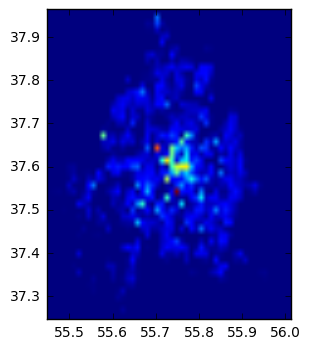

In [13]:
samp = random.sample(population=flats.index, k=len(flats))
heatmap, xedges, yedges = np.histogram2d(flats.ix[samp,'lat'], flats.ix[samp,'lon'], bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

Многовато квартир в центре... Наверняка, это риелторы

In [15]:
flats.columns

Index([u'bal0', u'bal1', u'bal10', u'bal11', u'bal2', u'bal3', u'bal4',
       u'bal5', u'bal6', u'bal7', u'bal8', u'bal9', u'elev0', u'elev1',
       u'flat_url', u'floor', u'hfloor', u'htype', u'kitarea', u'lat',
       u'livarea', u'lon', u'offertype', u'overallarea', u'parktype', u'price',
       u'rdate', u'roomarea0', u'roomarea1', u'roomarea10', u'roomarea11',
       u'roomarea2', u'roomarea3', u'roomarea4', u'roomarea5', u'roomarea6',
       u'roomarea7', u'roomarea8', u'roomarea9', u'rooms', u'slavnum',
       u'ulavnum', u'view', u'dist_to_cent', u'closest_metro'],
      dtype='object')

bal0 - разные типы балконов и их количество, остальные bal* бесполезны

elev* - типы лифтов и их количество

floor - этаж квартиры

hfloor - этажей в доме

htype - тип дома

kitarea - площадь кухни

lat, lon - широта, долгота

offertype - тип сделки

overallarea - общая пл квартиры

parktype - тип парковки

rdate - дата сдачи дома (0, если уже сдан)

roomareaN - равна площади комнаты, если rooms-1 >= N, и нулю в противном случае

rooms - количество комнат

*lavnum - количество раздельных/объединенных санузлов

view - вид из квартиры

dist_to_cent - расстояние до центра

closest_metro - расстояние до ближайшего метро

In [16]:
flats = flats.drop(['bal' + str(x) for x in range(1,12)], axis=1)

In [17]:
flats.head()

,bal0,elev0,elev1,flat_url,floor,hfloor,htype,kitarea,lat,livarea,...,roomarea6,roomarea7,roomarea8,roomarea9,rooms,slavnum,ulavnum,view,dist_to_cent,closest_metro
0,NaN,2 пасс,NaN,http://www.cian.ru/sale/flat/31158628/,2.0,10.0,"вторичка,кирпичный",7.0,55.763067,27.0,...,0.0,0.0,0.0,0.0,2,NaN,1.0,двор,0.016468,0.003071
1,1 балк,2 пасс,2 груз,http://www.cian.ru/sale/flat/142411682/,11.0,22.0,"вторичка,кирпично-монолитный",10.0,55.925672,43.0,...,0.0,0.0,0.0,0.0,3,1.0,NaN,двориулица,0.189690,0.051705
2,NaN,NaN,NaN,http://www.cian.ru/sale/flat/146034526/,1.0,5.0,"вторичка,панельный",6.0,55.776340,26.0,...,0.0,0.0,0.0,0.0,2,NaN,1.0,двориулица,0.123416,0.017357
3,1 балк,1 пасс,NaN,http://www.cian.ru/sale/flat/151944809/,4.0,9.0,"вторичка,панельный",7.0,55.616209,36.0,...,0.0,0.0,0.0,0.0,3,1.0,NaN,двор,0.161571,0.011365
4,1 лодж,1 пасс,1 груз,http://www.cian.ru/sale/flat/149703671/,10.0,14.0,"вторичка,кирпичный",7.0,55.747024,19.0,...,0.0,0.0,0.0,0.0,1,1.0,NaN,двор,0.048252,0.003252


In [18]:
cat = ['bal0', 'elev0', 'elev1', 'htype', 'offertype', 'parktype', 'view']

Если указан *lavnum, но другой не указан, то заполнить его нулем:

In [19]:
flats.ix[np.bitwise_and(np.bitwise_xor(flats['slavnum'].isnull(), flats['ulavnum'].isnull()),flats['slavnum'].isnull()), 'slavnum'] = 0
flats.ix[np.bitwise_and(np.bitwise_xor(flats['slavnum'].isnull(), flats['ulavnum'].isnull()),flats['ulavnum'].isnull()), 'ulavnum'] = 0

Местами в rooms стоит текст. Выкинем эти наблюдения

In [20]:
to_drop = []
for i in flats.index:
    try:
        int(flats.ix[i,'rooms'])
    except:
        to_drop.append(i)

In [21]:
len(to_drop)

2400

In [22]:
len(flats)

88608

In [23]:
flats = flats.drop(to_drop)

In [24]:
flats = pd.get_dummies(columns=cat,data=flats,dummy_na=True)

Преобразуем дату сдачи в хороший формат:

In [25]:
flats['rdate'][18]

'(4, 2017)'

In [26]:
for i in flats.index:
    try:
        ev = eval(flats.ix[i,'rdate'])
        flats.ix[i,'rdate'] = 4*ev[1] + ev[0] - 1
    except:
        pass

In [27]:
flats['rdate'] = flats['rdate'] - np.sort(flats['rdate'].dropna().unique())[1] + 1

In [28]:
flats.ix[flats['rdate'] == np.sort(flats['rdate'].dropna().unique())[0], :] = 0

In [29]:
np.sort(flats['rdate'].dropna().unique())

array([0, 1, 7, 8, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 25, 27,
       28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
       46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62,
       63, 66, 67], dtype=object)

Дамми переменные для равных nan регрессоров:

In [30]:
#nan_dummies = ['rdate','slavnum','ulavnum'] + [x for x in flats.columns if 'room' in x]
nan_dummies = ['rdate']

In [31]:
for d in nan_dummies:
    flats[d + '_nan'] = flats[d].isnull()
    flats.ix[flats[d].isnull(),d] = 0

In [32]:
urls = flats['flat_url']
flats = flats.drop('flat_url', axis=1)

In [33]:
for i in list(flats.columns):
    print(i)

floor
hfloor
kitarea
lat
livarea
lon
overallarea
price
rdate
roomarea0
roomarea1
roomarea10
roomarea11
roomarea2
roomarea3
roomarea4
roomarea5
roomarea6
roomarea7
roomarea8
roomarea9
rooms
slavnum
ulavnum
dist_to_cent
closest_metro
bal0_1 балк
bal0_1 лодж
bal0_15 балк
bal0_2 балк
bal0_2 лодж
bal0_3 балк
bal0_3 лодж
bal0_4 балк
bal0_4 лодж
bal0_5 балк
bal0_5 лодж
bal0_6 лодж
bal0_нет
bal0_nan
elev0_1 груз
elev0_1 пасс
elev0_10 пасс
elev0_13 пасс
elev0_2 груз
elev0_2 пасс
elev0_26 пасс
elev0_3 груз
elev0_3 пасс
elev0_33 пасс
elev0_4 груз
elev0_4 пасс
elev0_5 пасс
elev0_52 пасс
elev0_55 пасс
elev0_6 груз
elev0_6 пасс
elev0_67 пасс
elev0_8 пасс
elev0_94 пасс
elev0_nan
elev1_1 груз
elev1_10 груз
elev1_11 груз
elev1_2 груз
elev1_3 груз
elev1_36 груз
elev1_4 груз
elev1_5 груз
elev1_nan
htype_вторичка
htype_вторичка,блочный
htype_вторичка,деревянный
htype_вторичка,кирпично-монолитный
htype_вторичка,кирпичный
htype_вторичка,монолитный
htype_вторичка,панельный
htype_вторичка,сталинский
htype_вто

Теперь nan могут быть только в roomarea,rooms,livarea и прочих важных регрессорах. Наверное, это не очень качественные объявления. Выкинем их

In [34]:
cflats = flats.dropna()

In [35]:
len(cflats)

37704

In [36]:
fflats = flats.copy()
flats = cflats

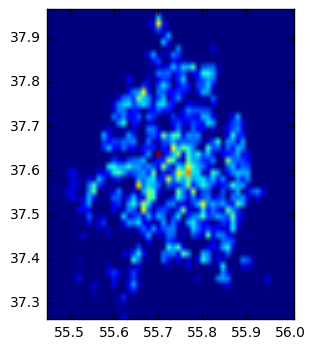

In [37]:
testf = flats.copy()
testf['dist_to_cent'] = np.sqrt((55.749905-flats['lat'])**2 + (37.615729-flats['lon'])**2)
max_dist = np.sqrt((55.749905-max_point[0])**2 + (37.615729-max_point[1])**2)

testf = testf.drop(testf.index[testf['dist_to_cent'] > max_dist])

samp = random.sample(population=testf.index, k=len(testf))
heatmap, xedges, yedges = np.histogram2d(testf.ix[samp,'lat'], testf.ix[samp,'lon'], bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

Картинка стала лучше: меньше квартир в центре

In [38]:
flats.fillna(inplace=True,value=-10)

In [39]:
flats['price'] = np.log(200+flats['price'])

In [40]:
flats.head()

,floor,hfloor,kitarea,lat,livarea,lon,overallarea,price,rdate,roomarea0,...,parktype_многоуровневая,parktype_на,parktype_наземная,parktype_подземная,parktype_nan,view_двор,view_двориулица,view_улица,view_nan,rdate_nan
0,2.0,10.0,7.0,55.763067,27.0,37.605831,37.0,16.556363,0,17.0,...,0,0,0,0,1,1,0,0,0,True
1,11.0,22.0,10.0,55.925672,43.0,37.544396,73.0,16.117115,0,18.0,...,0,0,0,0,1,0,1,0,0,True
2,1.0,5.0,6.0,55.776340,26.0,37.495177,42.0,15.856757,0,18.0,...,0,0,0,0,1,0,1,0,0,True
4,10.0,14.0,7.0,55.747024,19.0,37.567563,43.0,16.510151,0,19.0,...,0,0,1,0,0,1,0,0,0,True
6,13.0,15.0,11.1,55.848134,17.9,37.637506,42.4,16.084539,0,17.0,...,0,0,0,0,1,1,0,0,0,True


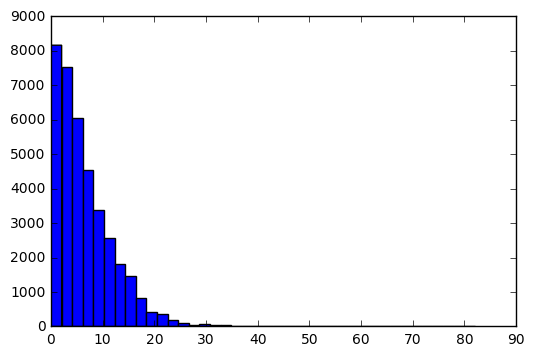

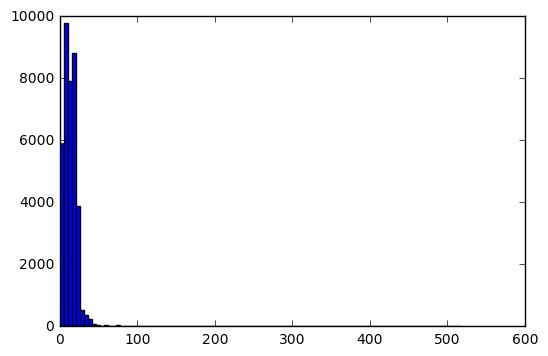

In [41]:
plt.hist(flats['floor'],bins=40)
plt.show()
plt.hist(flats['hfloor'],bins=100)
plt.show()

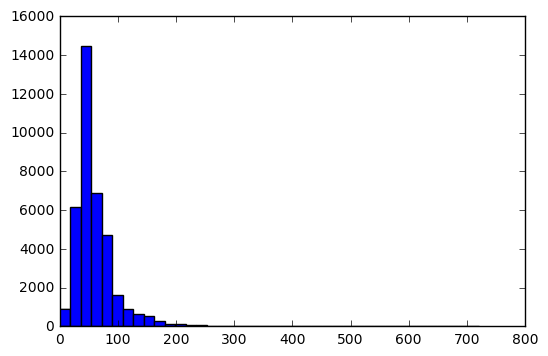

In [42]:
plt.hist(flats['overallarea'],bins=40)
plt.show()

In [43]:
#regs = ['overallarea', 'lon', 'lat', 'hfloor', 'floor', 'livarea', 'slavnum','roomarea3', 'kitarea', 'roomarea0', 'rooms', 'ulavnum', 'slavnum_nan']
regs = [x for x in flats.columns if not 'price' in x]
regs = np.array(regs)
X = np.array(flats.drop('price',axis=1), dtype='float32')
X = np.array(flats.ix[:,regs], dtype='float32')
y = np.array(flats['price'],dtype='float32')

In [44]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor

/home/nikita/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [46]:
X_train.shape

(33933, 103)

In [47]:
reg = RandomForestRegressor(n_estimators=1000, n_jobs=8, oob_score=True)

In [48]:
reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=8, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [49]:
np.mean(np.abs(np.exp(reg.predict(X_test)) - np.exp(y_test)))

2510056.5966971139

In [50]:
np.sqrt(np.mean(np.square(np.exp(reg.predict(X_test)) - np.exp(y_test))))

10234101.895770613

Важность признаков:

In [51]:
for i in list(regs[np.argsort(reg.feature_importances_)[::-1]]):
    print(i)

overallarea
dist_to_cent
hfloor
livarea
rooms
lon
lat
closest_metro
floor
kitarea
roomarea0
roomarea1
ulavnum
roomarea2
htype_вторичка,панельный
htype_вторичка,монолитный
parktype_подземная
slavnum
rdate
roomarea3
htype_вторичка,кирпично-монолитный
offertype_свободная
bal0_nan
elev0_nan
parktype_наземная
offertype_альтернатива
htype_вторичка,кирпичный
elev1_nan
htype_новостройка,монолитный
bal0_1 лодж
view_двор
elev0_1 пасс
parktype_nan
bal0_1 балк
view_улица
bal0_нет
htype_вторичка
view_двориулица
elev1_1 груз
roomarea4
elev0_2 пасс
rdate_nan
view_nan
bal0_2 лодж
elev1_2 груз
htype_вторичка,сталинский
htype_вторичка,блочный
bal0_2 балк
offertype_переуступка
offertype_214
elev0_4 пасс
htype_новостройка
elev0_1 груз
parktype_многоуровневая
htype_новостройка,кирпично-монолитный
elev0_3 пасс
elev1_4 груз
bal0_4 лодж
htype_новостройка,кирпичный
bal0_3 лодж
htype_новостройка,панельный
bal0_3 балк
elev0_2 груз
elev1_3 груз
elev0_4 груз
bal0_4 балк
elev0_3 груз
offertype_договор
roomarea5
hty

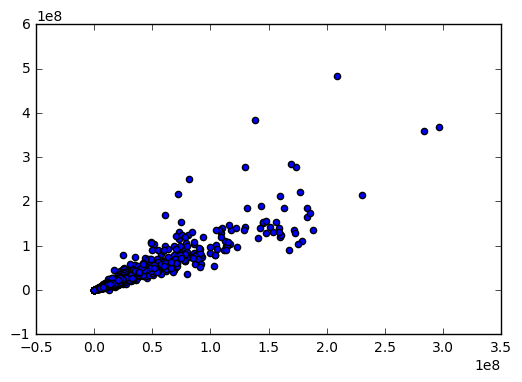

In [55]:
plt.scatter(np.exp(reg.predict(X_test)), np.exp(y_test))
plt.show()

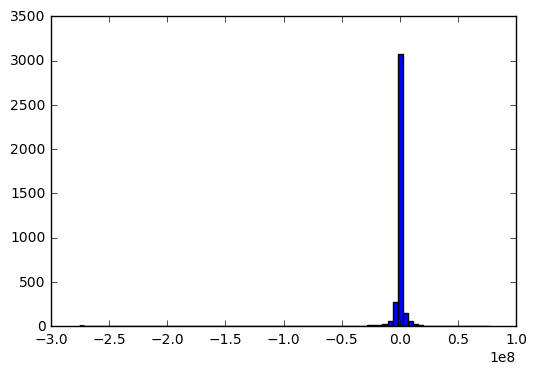

In [62]:
plt.hist(np.exp(reg.predict(X_test))-np.exp(y_test), bins=80)
plt.show()

In [66]:
np.sort(np.abs(np.exp(reg.predict(X_test))-np.exp(y_test)))[int(0.8*len(X_test))]

1970769.6423953176

С вероятностью в 0.8 попадаем в двухмиллионную окрестность цены

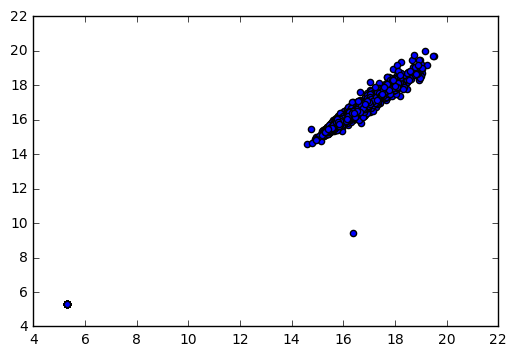

In [53]:
plt.scatter(reg.predict(X_test), y_test)
plt.show()

In [88]:
regs2 = regs[np.argsort(reg.feature_importances_)[::-1]][0:20]

In [89]:
regs2 = np.array(regs2)
X = np.array(flats.drop('price',axis=1), dtype='float32')
X = np.array(flats.ix[:,regs], dtype='float32')
y = np.array(flats['price'],dtype='float32')

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [91]:
reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=8, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [92]:
np.mean(np.abs(np.exp(reg.predict(X_test)) - np.exp(y_test)))

2510560.8400153769

In [93]:
X_test.shape

(3771, 103)

In [95]:
reg.fit(X_train, np.exp(y_train))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=8, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [96]:
np.mean(np.abs(reg.predict(X_test) - np.exp(y_test)))

2664131.6693702107